## Country-Data

### Группа

* 22П-3
### Команда

* Рахмаев Данил
* Михайлов Евгений

## Информация о датасете

Датасет содержит информацию о различных показателях по странам, что позволит нам проводить анализ и сравнение их экономических и социальных условий.

Набор данных в данном датасете позволяет исследовать отношение между различными экономическими и социальными характеристиками стран, выявлять закономерности и проводить кластеризацию для группировки стран по схожести показателей. Анализ этих данных может способствовать улучшению понимания глобальных трендов и формированию политик в области здравоохранения и экономики.

Модели которые мы будем использовать для обучения:

1. LogisticRegression
2. RandomForestClassifier
3. SVC

## Импортируем библиотеки


In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import warnings

In [469]:
import warnings
warnings.filterwarnings('ignore')

## Загружаем данные

In [470]:
df = pd.read_csv('/Users/evgenijmihajlov/Учебный материал/machine learning/Files/Country-data.csv')

In [471]:
# Выводим первые 5 строк данных
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


В датасете 167 записи и 10 признаков

* Country – название страны.

* Child_mort – коэффициент детской смертности.

* Exports – объем экспорта.

* Health – процент расходов на здравоохранение.

* Imports – объем импорта.

* Income – доход.

* Inflation – инфляция.

* Life_expect – ожидаемая продолжительность жизни.

* Total_fer – общий коэффициент рождаемости.

* GDPP – ВВП на душу населения.(целевая переменная)

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [473]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Аномальные значения присутствуют в признаки gdpp

In [474]:
# Проверка дубликатов
df.duplicated().sum()

0

In [475]:
# Стандартизация значений

from sklearn.preprocessing import StandardScaler
countries = df['country']
df_numeric = df.drop(columns=['country'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)
scaled_df = pd.DataFrame(scaled_data, columns=df_numeric.columns)
scaled_df['country'] = countries


In [476]:
scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,Vanuatu
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,Venezuela
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,Vietnam
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,Yemen


<Figure size 1500x1000 with 0 Axes>

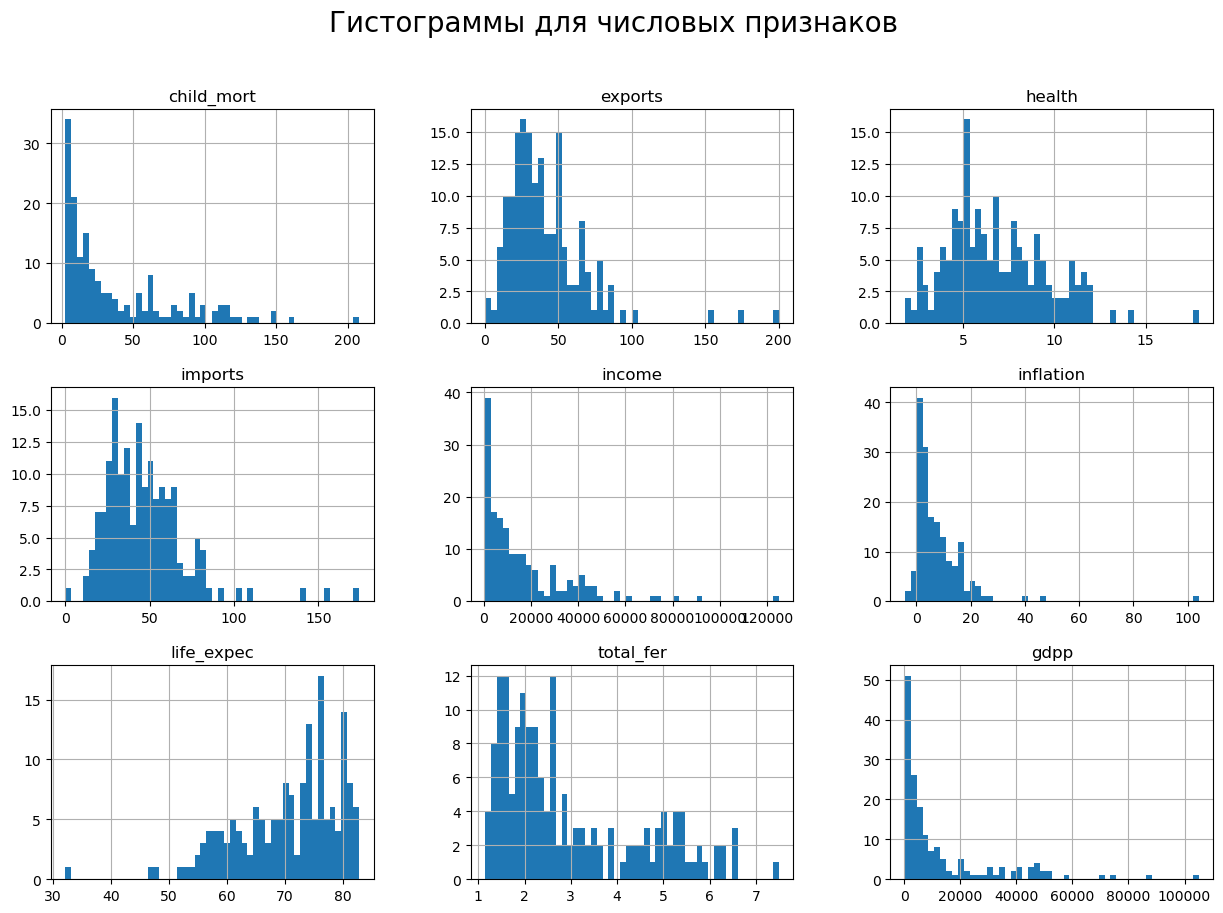

In [477]:
plt.figure(figsize=(15, 10))
df_numeric = df.select_dtypes(include=np.number)
df_numeric.hist(bins=50, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Гистограммы для числовых признаков', fontsize=20)
plt.show()

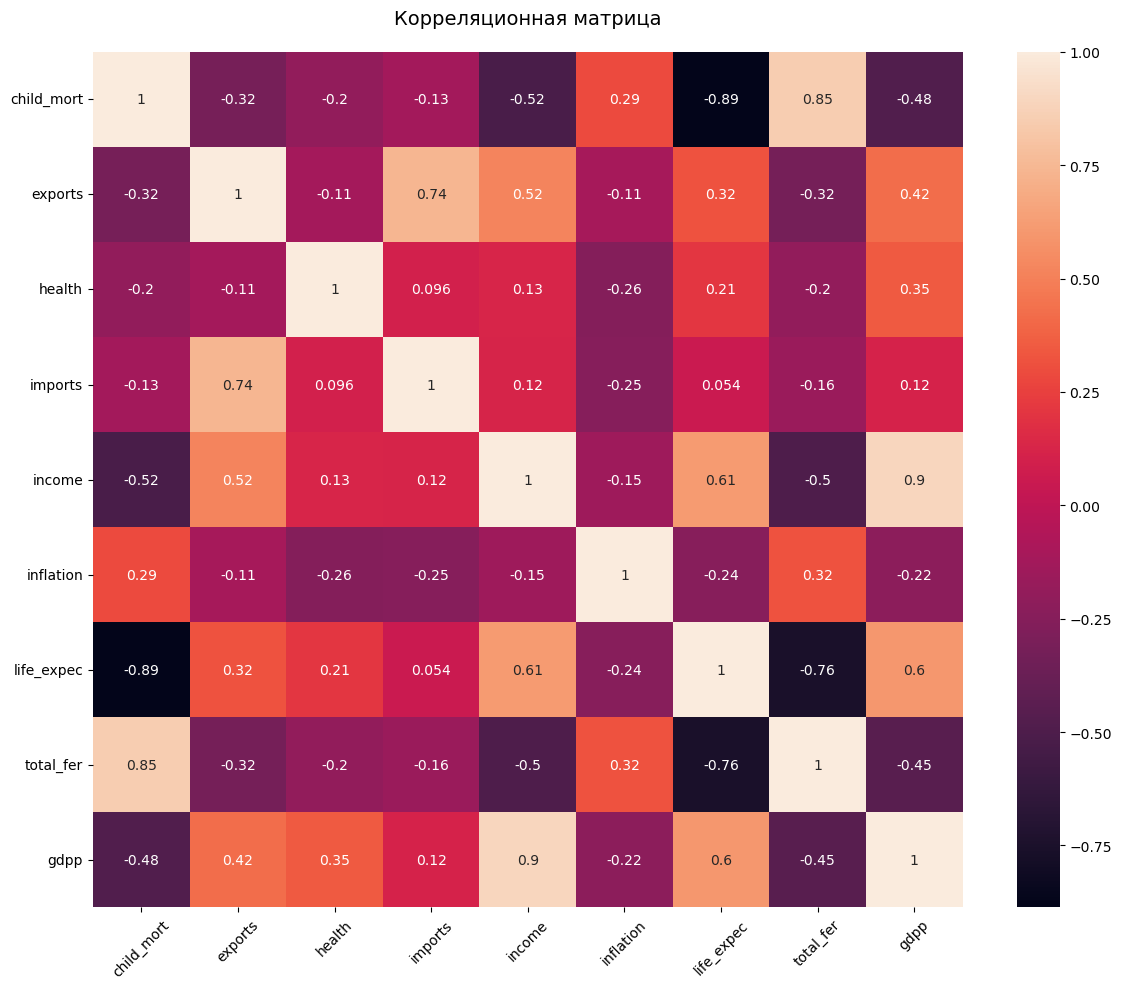

In [478]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='rocket',
)
plt.title('Корреляционная матрица', fontsize=14, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Наблюдается большая зависимость между признакми GDPP и Income, так есть незначительная зависимость с life_expec. 
Так же есть больщая отрицательная зависимость между life_expec и child_mort.

In [479]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

### Метод локтя

Text(0, 0.5, 'Inertia')

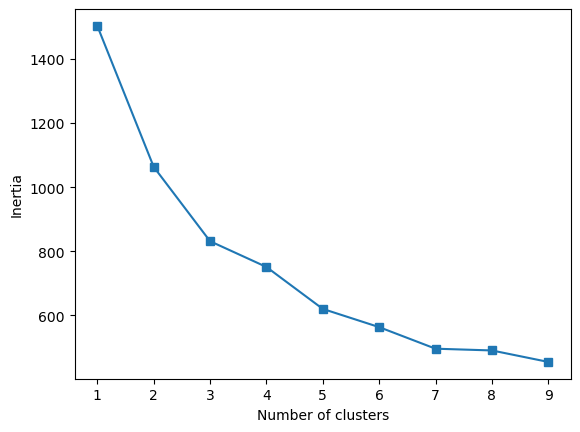

In [480]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,  random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10),inertia, marker="s")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

перегиб идет на числе 3

### Кластеризация

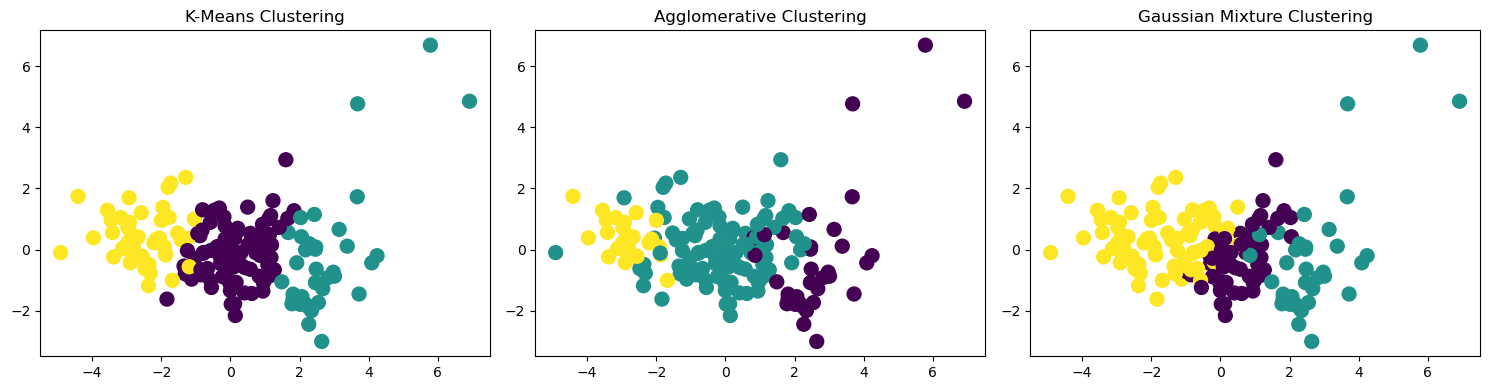

dict_keys(['K-Means', 'Agglomerative', 'Gaussian Mixture'])


In [481]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

models = {
    "K-Means": KMeans(n_clusters=3, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "Gaussian Mixture": GaussianMixture(n_components=3, random_state=42) 
}


results = {}
for name, model in models.items():
    if name == "Gaussian Mixture":
        results[name] = model.fit(scaled_data).predict(scaled_data)  
    else:
        results[name] = model.fit_predict(scaled_data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(15, 4))
for i, (name, labels) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(pca_data[:,0], pca_data[:,1], c=labels, cmap='viridis', s=100)
    plt.title(f'{name} Clustering')
    

plt.tight_layout()
plt.show()
print(results.keys())

In [482]:
df['cluster'] = results['K-Means']

In [483]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


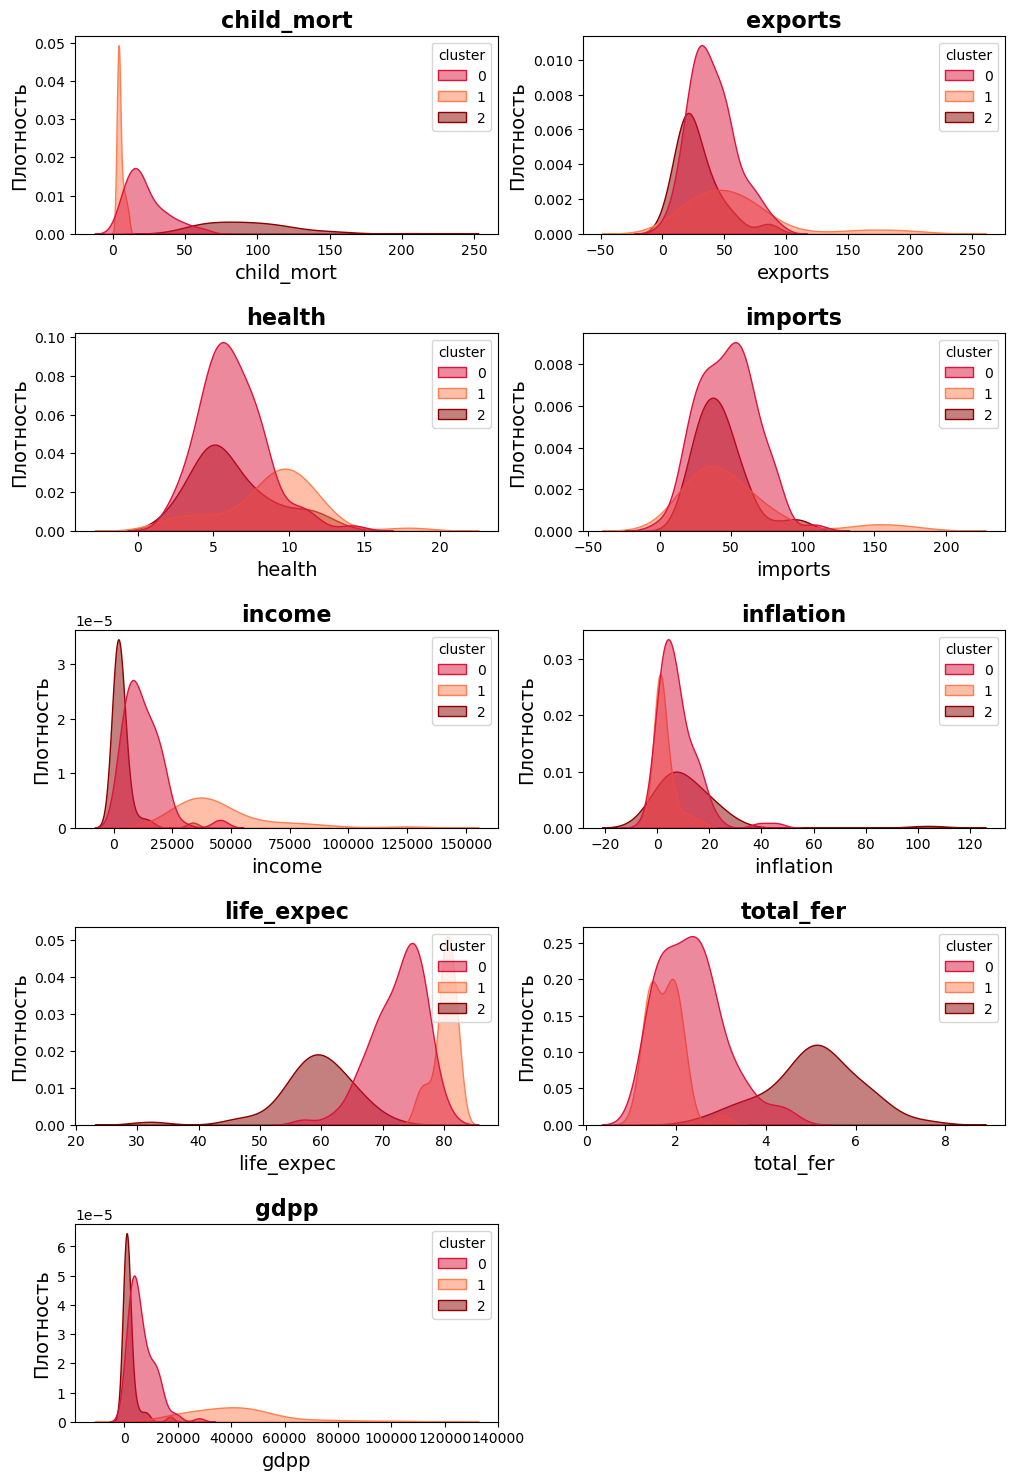

In [484]:

columns = df.drop(['cluster', 'country'], axis=1).columns
n_columns = len(columns)
n_rows = (n_columns + 1) // 2 
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 18), squeeze=False)
plt.subplots_adjust(hspace=0.5)
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.kdeplot(data=df,
                palette=['#DC143C','#FF7F50','#8B0000'],
                x=column,
                fill=True,
                alpha=0.5,
                hue='cluster',
                ax=ax)
    ax.set_title(column, fontweight='bold', fontsize=16)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Плотность', fontsize=14)
if n_columns % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.show()

Можно заметить, что кластеризация четко разделила страны на развитые (кластер 1), развивающиеся (кластер 0) и наименее развитые (кластер 2) на основе социально-экономических показателей.

### Классификация

In [485]:
y = df['cluster'] 
X = df.drop(columns=['country', 'cluster'])  

In [486]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.33, 
    random_state=48
)

## LogisticRegression

In [487]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.79      1.00      0.88        11
           2       1.00      0.94      0.97        18

    accuracy                           0.93        56
   macro avg       0.92      0.94      0.92        56
weighted avg       0.94      0.93      0.93        56



## RandomForestClassifier

In [488]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=46)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9642857142857143
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        18

    accuracy                           0.96        56
   macro avg       0.96      0.97      0.96        56
weighted avg       0.97      0.96      0.96        56



## SVC

In [489]:
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.83      0.91      0.87        11
           2       1.00      0.94      0.97        18

    accuracy                           0.93        56
   macro avg       0.92      0.93      0.92        56
weighted avg       0.93      0.93      0.93        56



## Вывод

В ходе работы был выполнен импорт данных о различных показателях стран. 
Данные были стандартизированы для адекватной кластеризации, и применены методы визуализации, такие как гистограммы и корреляционная матрица, что позволило выявить взаимосвязи между признаками.

Была проведена кластеризация с использованием метода KMeans, GaussianMixture и AgglomerativeClustering, в результате которой выделены три кластера.
Для классификации были выбраны кластеры модели K-Means.
Были использованны такие модели классификации как: 

1. LogisticRegression
2. RandomForestClassifier
3. SVC

Все модели продемонстрировали хорошую точность в предсказании кластеров.
Лучшей моделью оказалась RandomForestClassifier показав результат 96.4% предсказания.